In [1]:
import pandas as pd
data=pd.read_excel(r'E:\02_Postgraduate_UCAS\01_Class Tasks\01_Courses\02_预测理论与方法_2024秋_汤玲老师\03_Data\carbonprice.xlsx')

In [5]:
#插值法处理缺失值
data["Power"]= data["Active_Power"].interpolate(option="spline")

In [18]:
#data.to_csv('D:/研究生/01_班级学业工作/01_课程方面/02_预测理论与方法_2024秋_汤玲老师/插值_Yulara练习数据.csv', index=True)

In [7]:
#一阶差分
data['Diff_Power'] = data['Power'].diff()

In [9]:
data['Diff_Power']= data['Diff_Power'].interpolate(option="spline")

In [11]:
data.to_csv('D:/研究生/01_班级学业工作/01_课程方面/02_预测理论与方法_2024秋_汤玲老师/差分_Yulara练习数据.csv', index=True)

In [ ]:
#以下为差分数据导入

In [1]:
import pandas as pd
data = pd.read_csv('D:/研究生/01_班级学业工作/01_课程方面/02_预测理论与方法_2024秋_汤玲老师/差分_Yulara练习数据.csv', index_col='Time', parse_dates=True)

In [ ]:
#从该行开始进行

In [2]:
import pandas as pd
data=pd.read_excel(r'E:\02_Postgraduate_UCAS\01_Class Tasks\01_Courses\02_预测理论与方法_2024秋_汤玲老师\03_Data\carbonprice.xlsx')
dy=data['CarbonP']

<mark><font color=red size=6 face=雅黑>平稳性检验<font><mark>

方法一：时序图检验

<Axes: >

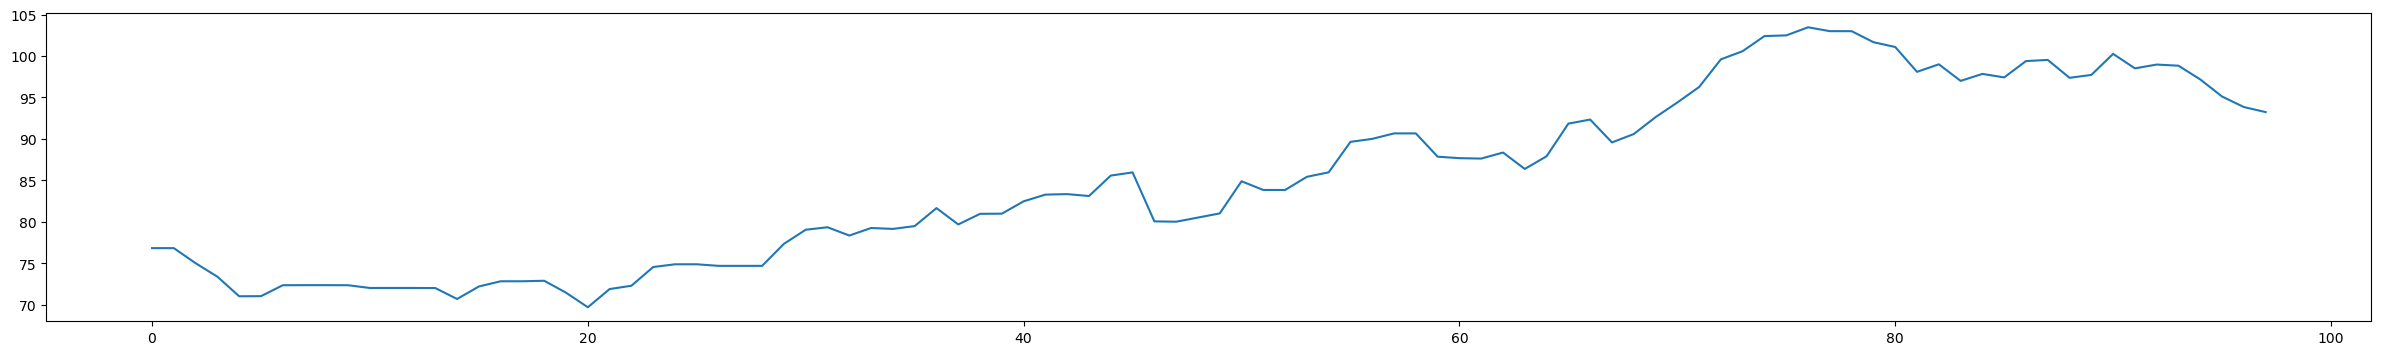

In [3]:
import matplotlib.pyplot as plt
dy.plot(figsize=(30,4))
#plt.savefig('D:/研究生/01_班级学业工作/01_课程方面/02_预测理论与方法_2024秋_汤玲老师/时序图1.png')

方法二：自相关图检验

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

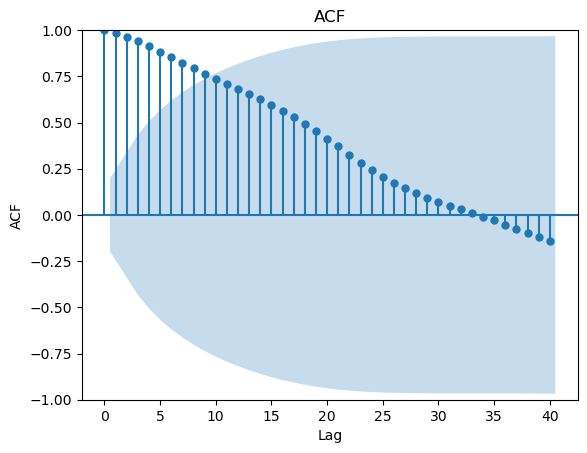

In [5]:
plot_acf(dy,lags=40)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('ACF')
#plt.savefig('D:/研究生/01_班级学业工作/01_课程方面/02_预测理论与方法_2024秋_汤玲老师/自相关图1.png')
plt.show()

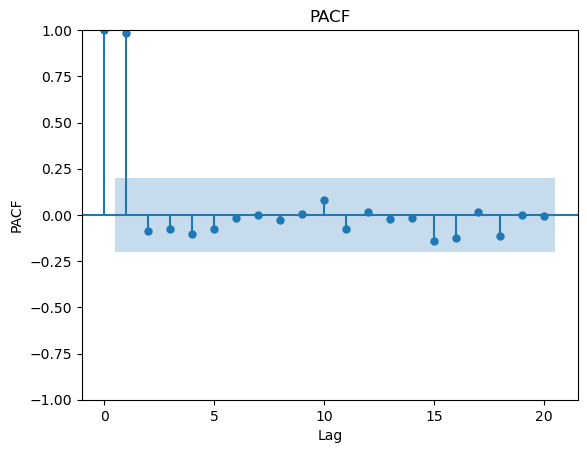

In [7]:
plot_pacf(dy,lags=20)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('PACF')
#plt.savefig('D:/研究生/01_班级学业工作/01_课程方面/02_预测理论与方法_2024秋_汤玲老师/偏自相关图.png')
plt.show()

方法三：单位根检验

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adf_test = adfuller(dy)

In [10]:
print("Level ADF statistic:",adf_test[0])
print("Level P-value:",adf_test[1])

Level ADF statistic: -0.7575457906513353
Level P-value: 0.8312758041897673


<mark><font color=red size=6 face=雅黑>ARIMA模型<font><mark>

In [11]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import statsmodels.api as sm

In [2]:
#data = pd.read_csv('D:/研究生/01_班级学业工作/01_课程方面/02_预测理论与方法_2024秋_汤玲老师/差分_Yulara练习数据.csv', index_col='Time', parse_dates=True)

In [12]:
train_size = int(len(dy) * 0.8)
train_data =dy[:train_size]
test_data =dy[train_size+1:]

In [13]:
train_results = sm.tsa.arma_order_select_ic(train_data, ic=['aic', 'bic'], trend='n', max_ar=5, max_ma=5)

D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: Conver

In [14]:
print('AIC 最优参数:', train_results.aic_min_order)
print('BIC 最优参数:', train_results.bic_min_order)

AIC 最优参数: (1, 0)
BIC 最优参数: (1, 0)


In [15]:
#模型构建
model=ARIMA(train_data,order=(1,0,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                CarbonP   No. Observations:                   78
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -148.933
Date:                Tue, 07 Jan 2025   AIC                            305.865
Time:                        19:15:24   BIC                            315.292
Sample:                             0   HQIC                           309.639
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.3205     10.989      7.946      0.000      65.782     108.859
ar.L1          0.9883      0.027     36.963      0.000       0.936       1.041
ma.L1          0.1554      0.160      0.970      0.3

In [16]:
#模型残差检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(model_fit.resid,lags=[10],boxpierce=True))

     lb_stat  lb_pvalue   bp_stat  bp_pvalue
10  1.468517    0.99903  1.344015   0.999345


In [17]:
#模型预测
import numpy as np
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predict_power = model_fit.predict(start=start_idx, end=end_idx)
# 模型评价
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data,predict_power)
mse =mean_squared_error(test_data,predict_power)
rmse =np.sqrt(mse)
# 打印结果
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:",rmse)

MAE: 3.2193411701169636
MSE: 13.166979536455692
RMSE: 3.628633287679494


In [19]:
# 对模型方向性进行评价
def compute_Dstat(actual_prices, predicted_prices):
    N = len(actual_prices)
    correct_predictions = 0
    for t in range(N - 1):
        if (actual_prices[t + 1] - actual_prices[t]) * (predicted_prices[t + 1] - predicted_prices[t]) >= 0:
            correct_predictions += 1
    Dstat = (correct_predictions / (N - 1))
    return Dstat


# 检查并转换数据类型
if not isinstance(test_data, np.ndarray):
    test_data = np.array(test_data)
if not isinstance(predict_power, np.ndarray):
    predict_power = np.array(predict_power)


# 检查并处理数据长度
if len(test_data)!= len(predict_power):
    print("Warning: Data length mismatch.")
    # 这里可以根据实际情况处理长度不匹配的问题，例如截取较长的数组
    min_length = min(len(test_data), len(predict_power))
    test_data = test_data[:min_length]
    predict_power = predict_power[:min_length]


# 检查并处理 NaN 值
test_data = np.nan_to_num(test_data)
predict_power = np.nan_to_num(predict_power)


dstat = compute_Dstat(test_data, predict_power)
print("Dstat:", dstat)

Dstat: 0.6111111111111112


In [ ]:
#对模型方向性进行评价无法进行
def compute_Dstat(actual_prices,predicted_prices):
    N= len(actual_prices)
    correct_predictions =0
    for t in range(N -1):
        if(actual_prices[t + 1]-actual_prices[t])*(predicted_prices[t + 1]-predicted_prices[t])>= 0:
            correct_predictions += 1
    Dstat=(correct_predictions/(N-1))
    return Dstat
dstat = compute_Dstat(test_data,predict_power)
print("Dstat:",dstat)

<mark><font color=red size=6 face=雅黑>SARIMA模型<font><mark>

In [20]:
#AIC准则
import itertools
#定义季节性参数P,Q,取0到2之间的任意值
P=Q=range(0,3)
s=12 #季节性周期，这里设置为12,表示年度季节性
#生成P和Q的组合，并创建季节性参数列表
seasonal_pdq =[(x[0],0,x[1],s)for x in list(itertools.product(P,Q))]
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 对所有的季节性参数组合进行遍历
for seasonal_param in seasonal_pdq:
    try:
        # 建立季节性 ARIMA 模型
        model = SARIMAX(endog=train_data,seasonal_order=seasonal_param)
        model_fit = model.fit() #拟合模型
        aic  = model_fit.aic
        # 初始化最优 AIC 为一个大的数值
        best_aic = float('inf')
        # 如果当前模型的 AIC 小于最优 AIC，则更新最优模型、最优季节性参数和最优 AIC
        if aic < best_aic:
            best_model = model_fit
            best_seasonal_param = seasonal_param
            best_aic = aic
    except Exception as e:
        print(f"Model fitting failed for parameters {seasonal_param}: {e}")

# 循环结束后，best_model将包含最佳模型
if best_model:
    print(f"Best model AIC: {best_aic}")
    print(f"Best seasonal parameters: {best_seasonal_param}")
    #你可以用 best_model 进行进一步的分析或预测
else:
    print("No model was fitted successfully.")

D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaco

Best model AIC: 316.0475169057637
Best seasonal parameters: (2, 0, 2, 12)


In [21]:
#BIC准则
import itertools
#定义季节性参数P,Q,取0到2之间的任意值
P=Q=range(0,3)
s=12 #季节性周期，这里设置为12,表示年度季节性
#生成P和Q的组合，并创建季节性参数列表
seasonal_pdq =[(x[0],0,x[1],s)for x in list(itertools.product(P,Q))]
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 对所有的季节性参数组合进行遍历
for seasonal_param in seasonal_pdq:
    try:
        # 建立季节性 ARIMA 模型
        model = SARIMAX(endog=train_data,seasonal_order=seasonal_param)
        model_fit = model.fit() #拟合模型
        bic  = model_fit.bic
        # 初始化最优 AIC 为一个大的数值
        best_bic = float('inf')
        # 如果当前模型的 AIC 小于最优 AIC，则更新最优模型、最优季节性参数和最优 AIC
        if bic < best_bic:
            best_model = model_fit
            best_seasonal_param = seasonal_param
            best_bic = bic
    except Exception as e:
        print(f"Model fitting failed for parameters {seasonal_param}: {e}")

# 循环结束后，best_model将包含最佳模型
if best_model:
    print(f"Best model BIC: {best_bic}")
    print(f"Best seasonal parameters: {best_seasonal_param}")
    #你可以用 best_model 进行进一步的分析或预测
else:
    print("No model was fitted successfully.")

D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaco

Best model BIC: 330.18776986590126
Best seasonal parameters: (2, 0, 2, 12)


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np

In [23]:
#设置SARIMA模型的参数
order =(2,0,4)#p:AR阶数，d:差分阶数，q:MA阶数
seasonal_order=(2,0,1,12) #P:季节性AR阶数，D:季节性差分阶数，Q:季节性MA阶数，s:季节周期
#拟合SARIMA模型
model = SARIMAX(train_data,order=order,seasonal_order=seasonal_order)
result = model.fit()
result.summary()

D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
D:\Total_APP\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              CarbonP   No. Observations:                   78
Model:             SARIMAX(2, 0, 4)x(2, 0, [1], 12)   Log Likelihood                -150.617
Date:                              Tue, 07 Jan 2025   AIC                            321.234
Time:                                      19:20:57   BIC                            344.802
Sample:                                           0   HQIC                           330.669
                                               - 78                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0370      0.150      0.247      0.805      -0.257       0.331
ar.L2          0.9627      0.151      6.384      0.000       0.667       1.258
ma.L1          1.1252      0.291      3.870      0.000       0.555       1.695
ma.L2          0.0839      0.202      0.416      0.677      -0.311       0.479
ma.L3         -0.0225      0.230     -0.098      0.922      -0.474       0.429
ma.L4          0.0277      0.201      0.138      0.890      -0.365       0.421
ar.S.L12       0.9562     14.070      0.068      0.946     -26.621      28.533
ar.S.L24      -0.0626      0.767     -0.082      0.935      -1.566       1.440
ma.S.L12      -0.8951     14.159     -0.063      0.950     -28.646      26.856
sigma2         2.4897      0.529      4.705      0.000       1.452       3.527
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                16.37
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.52
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox
#residuals是你从SARIMAX模型中得到的残差序列
residuals = result.resid
#进行Ljung-Box检验
lb_test_result =acorr_ljungbox(residuals,lags=[10],boxpierce=True)
print('result'+str(lb_test_result))

result    lb_stat  lb_pvalue   bp_stat  bp_pvalue
10  0.25936        1.0  0.240892        1.0


In [25]:
import numpy as np
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predict_power = result.predict(start=start_idx, end=end_idx)
# 模型评价
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data,predict_power)
mse =mean_squared_error(test_data,predict_power)
rmse =np.sqrt(mse)
# 打印结果
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:",rmse)

MAE: 4.984926686214795
MSE: 29.56797191650631
RMSE: 5.437643967428017


In [26]:
# 对模型方向性进行评价
def compute_Dstat(actual_prices, predicted_prices):
    N = len(actual_prices)
    correct_predictions = 0
    for t in range(N - 1):
        if (actual_prices[t + 1] - actual_prices[t]) * (predicted_prices[t + 1] - predicted_prices[t]) >= 0:
            correct_predictions += 1
    Dstat = (correct_predictions / (N - 1))
    return Dstat


# 检查并转换数据类型
if not isinstance(test_data, np.ndarray):
    test_data = np.array(test_data)
if not isinstance(predict_power, np.ndarray):
    predict_power = np.array(predict_power)


# 检查并处理数据长度
if len(test_data)!= len(predict_power):
    print("Warning: Data length mismatch.")
    # 这里可以根据实际情况处理长度不匹配的问题，例如截取较长的数组
    min_length = min(len(test_data), len(predict_power))
    test_data = test_data[:min_length]
    predict_power = predict_power[:min_length]


# 检查并处理 NaN 值
test_data = np.nan_to_num(test_data)
predict_power = np.nan_to_num(predict_power)


dstat = compute_Dstat(test_data, predict_power)
print("Dstat:", dstat)

Dstat: 0.5
